In [4]:
import matplotlib.pyplot as plt
import pickle
import pandas as pd

In [2]:
dir = "./output"

In [6]:
results = pd.read_csv(dir + "/grid_search.csv")
results

,1 Month Anomaly (%) Rainfall,3 Months Anomaly (%) Rainfall,Cereals and tubers,Exchange rate (USD/LCU),FCS,Fatality,Lat,Lon,NDVI Anomaly,Population,Rainfall (mm),Ramadan,rCSI,h,val_loss,train_loss
0,3,3,3,3,3,3,3,3,3,3,3,3,3,1,0.310506,0.182266
1,3,3,3,3,3,3,3,3,3,3,3,3,3,2,1.096759,0.695042
2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2.274273,1.540588
3,3,3,3,3,3,3,3,3,3,3,3,3,3,4,4.248630,2.589059


In [3]:
trials = pickle.load(open(dir + "/hyp_trials.p", "rb"))

FileNotFoundError: [Errno 2] No such file or directory: './output/hyp_trials.p'

In [5]:
trials

In [6]:
# Results of various trials hyperopt optimization.
loss_history = [t["result"]["loss"] for t in trials.trials]
lags_history = [t["misc"]["vals"]["lags"][0] for t in trials.trials]
batch_size_history = [t["misc"]["vals"]["batch_size"][0] for t in trials.trials]

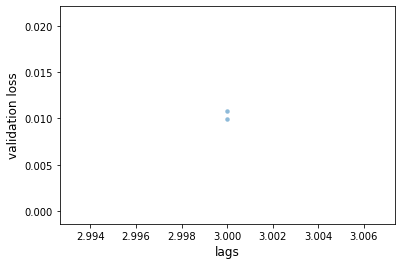

In [9]:
fig, ax = plt.subplots()
ax.scatter(lags_history, loss_history, s = 20, linewidth = 0.01, alpha = 0.5)
ax.set_xlabel("lags", fontsize = 12)
ax.set_ylabel("validation loss", fontsize = 12);

Text(0, 0.5, 'validation loss')

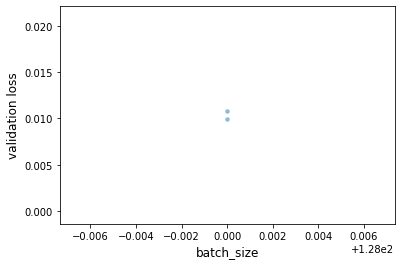

In [10]:
fig, ax = plt.subplots()
ax.scatter(batch_size_history, loss_history, s = 20, linewidth = 0.01, alpha = 0.5)
ax.set_xlabel("batch_size", fontsize = 12)
ax.set_ylabel("validation loss", fontsize = 12)